In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn')

#re_lim=(-2,1) 
#im_lim=(-1,1)

In [6]:
def plot_latin(re_list, im_list, re_lim=[-2,1], im_lim=[-1.25,1.25]):
    plt.scatter(re_list, im_list)
    plt.xticks(ticks=np.arange(re_lim[0], re_lim[1], (re_lim[1]-re_lim[0])/len(re_list)))
    plt.yticks(ticks=np.arange(im_lim[0], im_lim[1], (im_lim[1]-im_lim[0])/len(im_list)))
    plt.xlim(re_lim)
    plt.ylim(im_lim)
    plt.grid(b = True)


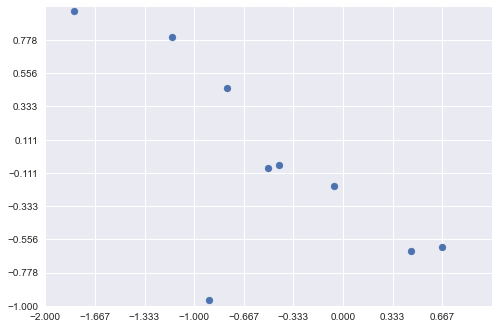

array([-1.15102808+0.79972032j, -0.7795203 +0.45516583j,
       -0.42760857-0.05541002j, -0.06019689-0.1953934j ,
        0.45948844-0.63360526j, -0.50274499-0.07512927j,
        0.66806857-0.60336657j, -0.89975132-0.96355914j,
       -1.80891948+0.97020871j])

In [20]:
def generate_pureRandomSample(n,re_lim=[-2,1], im_lim=[-1.25,1.25]):


    re = np.random.uniform(re_lim[0], re_lim[1], size=n) # type: ignore
    im = np.random.uniform(im_lim[0], im_lim[1], size=n) # type: ignore

    random_points = re+im*1j
    
    plot_latin(re, im)
    plt.show()
    
    return random_points

generate_pureRandomSample(9)

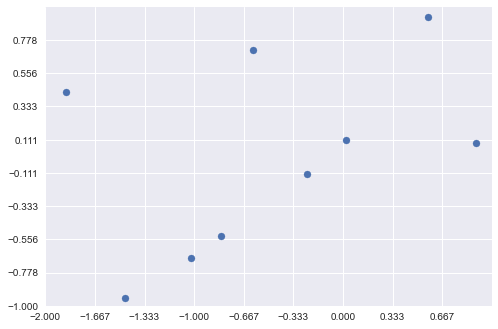

array([-1.86013991+0.4327951j , -1.46584704-0.94988111j,
       -1.02330276-0.67753336j, -0.82075547-0.53378863j,
       -0.60334793+0.71061075j, -0.24285143-0.11958471j,
        0.02365429+0.11240546j,  0.57444806+0.93205057j,
        0.89295391+0.08734495j])

In [21]:
def generate_latinHyperCube(n,re_lim=[-2,1], im_lim=[-1.25,1.25]):


    width_re = re_lim[1] - re_lim[0]
    width_im = im_lim[1] - im_lim[0]

    re_all = []
    im_all = []

    
    factor_re = width_re/n
    factor_im = width_im/n
    
    low_re = re_lim[0]
    high_re = low_re + factor_re

    low_im = im_lim[0]
    high_im = low_im + factor_im

    for i in range(n):
        re = np.random.uniform(low_re, high_re) 
        im = np.random.uniform(low_im,high_im) 
        # update the range for both real and imaginary axis
        low_re = high_re
        high_re = low_re + factor_re
        low_im = high_im
        high_im = low_im + factor_im
        re_all.append(re)
        im_all.append(im)   

    # In-place permutation for imaginary axis
    start = 0
    while(start+1 < n):
        selectIndex = np.random.randint(start,n)
        #swap start and selectIndex
        temp = im_all[selectIndex]
        im_all[selectIndex] = im_all[start]
        im_all[start] = temp
        start = start+1

    re_all = np.array(re_all)
    im_all = np.array(im_all)
    
    random_points = re_all+im_all*1j 
    
    plot_latin(re_all, im_all)
    plt.show()
   
    return random_points


generate_latinHyperCube(9)

3
2


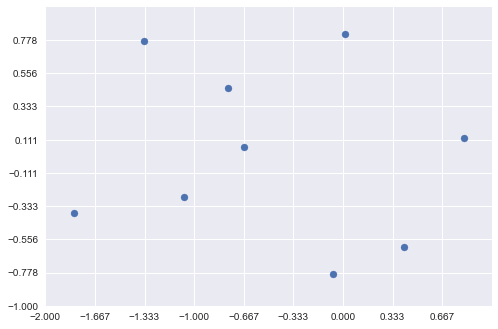

[-1.8095719435616828, -1.0706823684908127, -1.334640107399391, -0.06898401460030157, -0.6628447574044001, -0.7752279636377912, 0.40718764415679853, 0.811464747723476, 0.01600468538792299]
[-0.38249092517127337, -0.2701461274958237, 0.7738963263681196, -0.7874964295939217, 0.06017340964381024, 0.45714532171237066, -0.6053339076684449, 0.12320929461257157, 0.8150253404792789]


In [19]:
def generate_Orthogonal(n,re_lim=[-2,1], im_lim=[-1.25,1.25]):
    
    width_x = re_lim[1]-re_lim[0]
    width_y = im_lim[1]-im_lim[0]
   
    num_sq = n*n
    xlist = np.arange(num_sq).reshape((n,n))
    ylist = np.arange(num_sq).reshape((n,n))
    x_scale = width_x/(num_sq)
    y_scale = width_y/(num_sq)
    re = []
    im = []
    for i in range(n):
        xlist[i] = np.random.permutation(xlist[i])
        ylist[i] = np.random.permutation(ylist[i])
    for i in range(n):
        for j in range(n):
            x = -2.0 + x_scale*(xlist[i][j] + np.random.uniform())
            y = -1.0 + y_scale*(ylist[j][i] + np.random.uniform())
            re.append(x)
            im.append(y)
        
    plot_latin(re,im)
    plt.show()
    #print(re)
    #print(im)
    

generate_Orthogonal(3)    

In [ ]:
def generate_Orthogonal_inPlace(n,re_lim=[-2,1], im_lim=[-1.25,1.25]):
    
    width_x = re_lim[1]-re_lim[0]
    width_y = im_lim[1]-im_lim[0]
   
    num_sq = n*n
    xlist = np.arange(num_sq).reshape((n,n))
    ylist = np.arange(num_sq).reshape((n,n))
    x_scale = width_x/(num_sq)
    y_scale = width_y/(num_sq)
    re = []
    im = []
    
    # inplace permutation
    for i in range(n):
        xlist[i] = np.random.permutation(xlist[i])
        ylist[i] = np.random.permutation(ylist[i])
    for i in range(n):
        for j in range(n):
            x = -2.0 + x_scale*(xlist[i][j] + np.random.uniform())
            y = -1.0 + y_scale*(ylist[j][i] + np.random.uniform())
            re.append(x)
            im.append(y)
        
    plot_latin(re,im)
    plt.show()
    #print(re)
    #print(im)
    

#generate_Orthogonal(3)    